In [1]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import xml.etree.ElementTree as etree
import os
import pickle
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
annot_path = '../VOCdevkit/annots/'
images_path = '../VOCdevkit/images/'

In [5]:
# to perform test
annot_path = './test_annots/'
all_annots_files = os.listdir(annot_path)
all_labels = {}
all_labels_with_class = {}

for annot_file in all_annots_files:
    bboxes_alone = []
    bboxes_with_class = {}
    path = annot_path + annot_file
    fname = annot_file.split('.')[0]
    
    xml_file = etree.parse(path)
    root = xml_file.getroot()
    
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in bboxes_with_class.keys():
            bboxes_with_class[cls] = []
        xmin = int(round(float(obj.find('bndbox').find('xmin').text)))
        ymin = int(round(float(obj.find('bndbox').find('ymin').text)))
        xmax = int(round(float(obj.find('bndbox').find('xmax').text)))
        ymax = int(round(float(obj.find('bndbox').find('ymax').text)))
        coords = [xmin, ymin, xmax, ymax]
        bboxes_with_class[cls].append(coords)
        bboxes_alone.append(coords)
    all_labels[fname] = bboxes_alone
    all_labels_with_class[fname] = bboxes_with_class

In [6]:
all_labels

{'000001': [[48, 240, 195, 371], [8, 12, 352, 498]],
 '000002': [[139, 200, 207, 301]],
 '000003': [[123, 155, 215, 195], [239, 156, 307, 205]],
 '000004': [[13, 311, 84, 362],
  [362, 330, 500, 389],
  [235, 328, 334, 375],
  [175, 327, 252, 364],
  [139, 320, 189, 359],
  [108, 325, 150, 353],
  [84, 323, 121, 350]],
 '000005': [[263, 211, 324, 339],
  [165, 264, 253, 372],
  [5, 244, 67, 374],
  [241, 194, 295, 299],
  [277, 186, 312, 220]],
 '000006': [[187, 135, 282, 242],
  [154, 209, 369, 375],
  [255, 207, 366, 375],
  [298, 195, 332, 247],
  [279, 190, 308, 231],
  [137, 192, 151, 199],
  [137, 198, 156, 212],
  [138, 211, 249, 375]],
 '000007': [[141, 50, 500, 330]],
 '000008': [[192, 16, 364, 249]],
 '000009': [[69, 172, 270, 330],
  [150, 141, 229, 284],
  [285, 201, 327, 331],
  [258, 198, 297, 329]],
 '000010': [[87, 97, 258, 427], [133, 72, 245, 284]],
 '000011': [[126, 51, 330, 308]],
 '000012': [[156, 97, 351, 270]],
 '000013': [[299, 160, 446, 252]],
 '000014': [[72, 

In [7]:
all_labels_with_class

{'000001': {'dog': [[48, 240, 195, 371]], 'person': [[8, 12, 352, 498]]},
 '000002': {'train': [[139, 200, 207, 301]]},
 '000003': {'chair': [[239, 156, 307, 205]], 'sofa': [[123, 155, 215, 195]]},
 '000004': {'car': [[13, 311, 84, 362],
   [362, 330, 500, 389],
   [235, 328, 334, 375],
   [175, 327, 252, 364],
   [139, 320, 189, 359],
   [108, 325, 150, 353],
   [84, 323, 121, 350]]},
 '000005': {'chair': [[263, 211, 324, 339],
   [165, 264, 253, 372],
   [5, 244, 67, 374],
   [241, 194, 295, 299],
   [277, 186, 312, 220]]},
 '000006': {'chair': [[255, 207, 366, 375],
   [298, 195, 332, 247],
   [279, 190, 308, 231],
   [137, 192, 151, 199],
   [137, 198, 156, 212],
   [138, 211, 249, 375]],
  'diningtable': [[154, 209, 369, 375]],
  'pottedplant': [[187, 135, 282, 242]]},
 '000007': {'car': [[141, 50, 500, 330]]},
 '000008': {'chair': [[192, 16, 364, 249]]},
 '000009': {'horse': [[69, 172, 270, 330]],
  'person': [[150, 141, 229, 284],
   [285, 201, 327, 331],
   [258, 198, 297, 329]

In [8]:
annot_path = '../../../VOCdevkit/annots/'
images_path = '../../../VOCdevkit/images/'

In [9]:
all_annots_files = os.listdir(annot_path)
all_labels = {}
all_labels_with_class = {}

for annot_file in all_annots_files:
    bboxes_alone = []
    bboxes_with_class = {}
    path = annot_path + annot_file
    fname = annot_file.split('.')[0]
    
    xml_file = etree.parse(path)
    root = xml_file.getroot()
    
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in bboxes_with_class.keys():
            bboxes_with_class[cls] = []
        xmin = int(round(float(obj.find('bndbox').find('xmin').text)))
        ymin = int(round(float(obj.find('bndbox').find('ymin').text)))
        xmax = int(round(float(obj.find('bndbox').find('xmax').text)))
        ymax = int(round(float(obj.find('bndbox').find('ymax').text)))
        coords = [xmin, ymin, xmax, ymax]
        bboxes_with_class[cls].append(coords)
        bboxes_alone.append(coords)
    all_labels[fname] = bboxes_alone
    all_labels_with_class[fname] = bboxes_with_class
    if len(all_labels) % 300 == 0:
        print(len(all_labels), "parsed till now")

1 parsed till now
2 parsed till now
3 parsed till now
4 parsed till now
5 parsed till now
6 parsed till now
7 parsed till now
8 parsed till now
9 parsed till now
10 parsed till now
11 parsed till now
12 parsed till now
13 parsed till now
14 parsed till now
15 parsed till now
16 parsed till now
17 parsed till now
18 parsed till now
19 parsed till now
20 parsed till now
21 parsed till now
22 parsed till now
23 parsed till now
24 parsed till now
25 parsed till now
26 parsed till now
27 parsed till now
28 parsed till now
29 parsed till now
30 parsed till now
31 parsed till now
32 parsed till now
33 parsed till now
34 parsed till now
35 parsed till now
36 parsed till now
37 parsed till now
38 parsed till now
39 parsed till now
40 parsed till now
41 parsed till now
42 parsed till now
43 parsed till now
44 parsed till now
45 parsed till now
46 parsed till now
47 parsed till now
48 parsed till now
49 parsed till now
50 parsed till now
51 parsed till now
52 parsed till now
53 parsed till now
54

791 parsed till now
792 parsed till now
793 parsed till now
794 parsed till now
795 parsed till now
796 parsed till now
797 parsed till now
798 parsed till now
799 parsed till now
800 parsed till now
801 parsed till now
802 parsed till now
803 parsed till now
804 parsed till now
805 parsed till now
806 parsed till now
807 parsed till now
808 parsed till now
809 parsed till now
810 parsed till now
811 parsed till now
812 parsed till now
813 parsed till now
814 parsed till now
815 parsed till now
816 parsed till now
817 parsed till now
818 parsed till now
819 parsed till now
820 parsed till now
821 parsed till now
822 parsed till now
823 parsed till now
824 parsed till now
825 parsed till now
826 parsed till now
827 parsed till now
828 parsed till now
829 parsed till now
830 parsed till now
831 parsed till now
832 parsed till now
833 parsed till now
834 parsed till now
835 parsed till now
836 parsed till now
837 parsed till now
838 parsed till now
839 parsed till now
840 parsed till now


1241 parsed till now
1242 parsed till now
1243 parsed till now
1244 parsed till now
1245 parsed till now
1246 parsed till now
1247 parsed till now
1248 parsed till now
1249 parsed till now
1250 parsed till now
1251 parsed till now
1252 parsed till now
1253 parsed till now
1254 parsed till now
1255 parsed till now
1256 parsed till now
1257 parsed till now
1258 parsed till now
1259 parsed till now
1260 parsed till now
1261 parsed till now
1262 parsed till now
1263 parsed till now
1264 parsed till now
1265 parsed till now
1266 parsed till now
1267 parsed till now
1268 parsed till now
1269 parsed till now
1270 parsed till now
1271 parsed till now
1272 parsed till now
1273 parsed till now
1274 parsed till now
1275 parsed till now
1276 parsed till now
1277 parsed till now
1278 parsed till now
1279 parsed till now
1280 parsed till now
1281 parsed till now
1282 parsed till now
1283 parsed till now
1284 parsed till now
1285 parsed till now
1286 parsed till now
1287 parsed till now
1288 parsed t

1751 parsed till now
1752 parsed till now
1753 parsed till now
1754 parsed till now
1755 parsed till now
1756 parsed till now
1757 parsed till now
1758 parsed till now
1759 parsed till now
1760 parsed till now
1761 parsed till now
1762 parsed till now
1763 parsed till now
1764 parsed till now
1765 parsed till now
1766 parsed till now
1767 parsed till now
1768 parsed till now
1769 parsed till now
1770 parsed till now
1771 parsed till now
1772 parsed till now
1773 parsed till now
1774 parsed till now
1775 parsed till now
1776 parsed till now
1777 parsed till now
1778 parsed till now
1779 parsed till now
1780 parsed till now
1781 parsed till now
1782 parsed till now
1783 parsed till now
1784 parsed till now
1785 parsed till now
1786 parsed till now
1787 parsed till now
1788 parsed till now
1789 parsed till now
1790 parsed till now
1791 parsed till now
1792 parsed till now
1793 parsed till now
1794 parsed till now
1795 parsed till now
1796 parsed till now
1797 parsed till now
1798 parsed t

2149 parsed till now
2150 parsed till now
2151 parsed till now
2152 parsed till now
2153 parsed till now
2154 parsed till now
2155 parsed till now
2156 parsed till now
2157 parsed till now
2158 parsed till now
2159 parsed till now
2160 parsed till now
2161 parsed till now
2162 parsed till now
2163 parsed till now
2164 parsed till now
2165 parsed till now
2166 parsed till now
2167 parsed till now
2168 parsed till now
2169 parsed till now
2170 parsed till now
2171 parsed till now
2172 parsed till now
2173 parsed till now
2174 parsed till now
2175 parsed till now
2176 parsed till now
2177 parsed till now
2178 parsed till now
2179 parsed till now
2180 parsed till now
2181 parsed till now
2182 parsed till now
2183 parsed till now
2184 parsed till now
2185 parsed till now
2186 parsed till now
2187 parsed till now
2188 parsed till now
2189 parsed till now
2190 parsed till now
2191 parsed till now
2192 parsed till now
2193 parsed till now
2194 parsed till now
2195 parsed till now
2196 parsed t

2775 parsed till now
2776 parsed till now
2777 parsed till now
2778 parsed till now
2779 parsed till now
2780 parsed till now
2781 parsed till now
2782 parsed till now
2783 parsed till now
2784 parsed till now
2785 parsed till now
2786 parsed till now
2787 parsed till now
2788 parsed till now
2789 parsed till now
2790 parsed till now
2791 parsed till now
2792 parsed till now
2793 parsed till now
2794 parsed till now
2795 parsed till now
2796 parsed till now
2797 parsed till now
2798 parsed till now
2799 parsed till now
2800 parsed till now
2801 parsed till now
2802 parsed till now
2803 parsed till now
2804 parsed till now
2805 parsed till now
2806 parsed till now
2807 parsed till now
2808 parsed till now
2809 parsed till now
2810 parsed till now
2811 parsed till now
2812 parsed till now
2813 parsed till now
2814 parsed till now
2815 parsed till now
2816 parsed till now
2817 parsed till now
2818 parsed till now
2819 parsed till now
2820 parsed till now
2821 parsed till now
2822 parsed t

3384 parsed till now
3385 parsed till now
3386 parsed till now
3387 parsed till now
3388 parsed till now
3389 parsed till now
3390 parsed till now
3391 parsed till now
3392 parsed till now
3393 parsed till now
3394 parsed till now
3395 parsed till now
3396 parsed till now
3397 parsed till now
3398 parsed till now
3399 parsed till now
3400 parsed till now
3401 parsed till now
3402 parsed till now
3403 parsed till now
3404 parsed till now
3405 parsed till now
3406 parsed till now
3407 parsed till now
3408 parsed till now
3409 parsed till now
3410 parsed till now
3411 parsed till now
3412 parsed till now
3413 parsed till now
3414 parsed till now
3415 parsed till now
3416 parsed till now
3417 parsed till now
3418 parsed till now
3419 parsed till now
3420 parsed till now
3421 parsed till now
3422 parsed till now
3423 parsed till now
3424 parsed till now
3425 parsed till now
3426 parsed till now
3427 parsed till now
3428 parsed till now
3429 parsed till now
3430 parsed till now
3431 parsed t

4152 parsed till now
4153 parsed till now
4154 parsed till now
4155 parsed till now
4156 parsed till now
4157 parsed till now
4158 parsed till now
4159 parsed till now
4160 parsed till now
4161 parsed till now
4162 parsed till now
4163 parsed till now
4164 parsed till now
4165 parsed till now
4166 parsed till now
4167 parsed till now
4168 parsed till now
4169 parsed till now
4170 parsed till now
4171 parsed till now
4172 parsed till now
4173 parsed till now
4174 parsed till now
4175 parsed till now
4176 parsed till now
4177 parsed till now
4178 parsed till now
4179 parsed till now
4180 parsed till now
4181 parsed till now
4182 parsed till now
4183 parsed till now
4184 parsed till now
4185 parsed till now
4186 parsed till now
4187 parsed till now
4188 parsed till now
4189 parsed till now
4190 parsed till now
4191 parsed till now
4192 parsed till now
4193 parsed till now
4194 parsed till now
4195 parsed till now
4196 parsed till now
4197 parsed till now
4198 parsed till now
4199 parsed t

4753 parsed till now
4754 parsed till now
4755 parsed till now
4756 parsed till now
4757 parsed till now
4758 parsed till now
4759 parsed till now
4760 parsed till now
4761 parsed till now
4762 parsed till now
4763 parsed till now
4764 parsed till now
4765 parsed till now
4766 parsed till now
4767 parsed till now
4768 parsed till now
4769 parsed till now
4770 parsed till now
4771 parsed till now
4772 parsed till now
4773 parsed till now
4774 parsed till now
4775 parsed till now
4776 parsed till now
4777 parsed till now
4778 parsed till now
4779 parsed till now
4780 parsed till now
4781 parsed till now
4782 parsed till now
4783 parsed till now
4784 parsed till now
4785 parsed till now
4786 parsed till now
4787 parsed till now
4788 parsed till now
4789 parsed till now
4790 parsed till now
4791 parsed till now
4792 parsed till now
4793 parsed till now
4794 parsed till now
4795 parsed till now
4796 parsed till now
4797 parsed till now
4798 parsed till now
4799 parsed till now
4801 parsed t

5323 parsed till now
5324 parsed till now
5325 parsed till now
5326 parsed till now
5327 parsed till now
5328 parsed till now
5329 parsed till now
5330 parsed till now
5331 parsed till now
5332 parsed till now
5333 parsed till now
5334 parsed till now
5335 parsed till now
5336 parsed till now
5337 parsed till now
5338 parsed till now
5339 parsed till now
5340 parsed till now
5341 parsed till now
5342 parsed till now
5343 parsed till now
5344 parsed till now
5345 parsed till now
5346 parsed till now
5347 parsed till now
5348 parsed till now
5349 parsed till now
5350 parsed till now
5351 parsed till now
5352 parsed till now
5353 parsed till now
5354 parsed till now
5355 parsed till now
5356 parsed till now
5357 parsed till now
5358 parsed till now
5359 parsed till now
5360 parsed till now
5361 parsed till now
5362 parsed till now
5363 parsed till now
5364 parsed till now
5365 parsed till now
5366 parsed till now
5367 parsed till now
5368 parsed till now
5369 parsed till now
5370 parsed t

5959 parsed till now
5960 parsed till now
5961 parsed till now
5962 parsed till now
5963 parsed till now
5964 parsed till now
5965 parsed till now
5966 parsed till now
5967 parsed till now
5968 parsed till now
5969 parsed till now
5970 parsed till now
5971 parsed till now
5972 parsed till now
5973 parsed till now
5974 parsed till now
5975 parsed till now
5976 parsed till now
5977 parsed till now
5978 parsed till now
5979 parsed till now
5980 parsed till now
5981 parsed till now
5982 parsed till now
5983 parsed till now
5984 parsed till now
5985 parsed till now
5986 parsed till now
5987 parsed till now
5988 parsed till now
5989 parsed till now
5990 parsed till now
5991 parsed till now
5992 parsed till now
5993 parsed till now
5994 parsed till now
5995 parsed till now
5996 parsed till now
5997 parsed till now
5998 parsed till now
5999 parsed till now
6001 parsed till now
6002 parsed till now
6003 parsed till now
6004 parsed till now
6005 parsed till now
6006 parsed till now
6007 parsed t

6529 parsed till now
6530 parsed till now
6531 parsed till now
6532 parsed till now
6533 parsed till now
6534 parsed till now
6535 parsed till now
6536 parsed till now
6537 parsed till now
6538 parsed till now
6539 parsed till now
6540 parsed till now
6541 parsed till now
6542 parsed till now
6543 parsed till now
6544 parsed till now
6545 parsed till now
6546 parsed till now
6547 parsed till now
6548 parsed till now
6549 parsed till now
6550 parsed till now
6551 parsed till now
6552 parsed till now
6553 parsed till now
6554 parsed till now
6555 parsed till now
6556 parsed till now
6557 parsed till now
6558 parsed till now
6559 parsed till now
6560 parsed till now
6561 parsed till now
6562 parsed till now
6563 parsed till now
6564 parsed till now
6565 parsed till now
6566 parsed till now
6567 parsed till now
6568 parsed till now
6569 parsed till now
6570 parsed till now
6571 parsed till now
6572 parsed till now
6573 parsed till now
6574 parsed till now
6575 parsed till now
6576 parsed t

7161 parsed till now
7162 parsed till now
7163 parsed till now
7164 parsed till now
7165 parsed till now
7166 parsed till now
7167 parsed till now
7168 parsed till now
7169 parsed till now
7170 parsed till now
7171 parsed till now
7172 parsed till now
7173 parsed till now
7174 parsed till now
7175 parsed till now
7176 parsed till now
7177 parsed till now
7178 parsed till now
7179 parsed till now
7180 parsed till now
7181 parsed till now
7182 parsed till now
7183 parsed till now
7184 parsed till now
7185 parsed till now
7186 parsed till now
7187 parsed till now
7188 parsed till now
7189 parsed till now
7190 parsed till now
7191 parsed till now
7192 parsed till now
7193 parsed till now
7194 parsed till now
7195 parsed till now
7196 parsed till now
7197 parsed till now
7198 parsed till now
7199 parsed till now
7201 parsed till now
7202 parsed till now
7203 parsed till now
7204 parsed till now
7205 parsed till now
7206 parsed till now
7207 parsed till now
7208 parsed till now
7209 parsed t

7826 parsed till now
7827 parsed till now
7828 parsed till now
7829 parsed till now
7830 parsed till now
7831 parsed till now
7832 parsed till now
7833 parsed till now
7834 parsed till now
7835 parsed till now
7836 parsed till now
7837 parsed till now
7838 parsed till now
7839 parsed till now
7840 parsed till now
7841 parsed till now
7842 parsed till now
7843 parsed till now
7844 parsed till now
7845 parsed till now
7846 parsed till now
7847 parsed till now
7848 parsed till now
7849 parsed till now
7850 parsed till now
7851 parsed till now
7852 parsed till now
7853 parsed till now
7854 parsed till now
7855 parsed till now
7856 parsed till now
7857 parsed till now
7858 parsed till now
7859 parsed till now
7860 parsed till now
7861 parsed till now
7862 parsed till now
7863 parsed till now
7864 parsed till now
7865 parsed till now
7866 parsed till now
7867 parsed till now
7868 parsed till now
7869 parsed till now
7870 parsed till now
7871 parsed till now
7872 parsed till now
7873 parsed t

8491 parsed till now
8492 parsed till now
8493 parsed till now
8494 parsed till now
8495 parsed till now
8496 parsed till now
8497 parsed till now
8498 parsed till now
8499 parsed till now
8500 parsed till now
8501 parsed till now
8502 parsed till now
8503 parsed till now
8504 parsed till now
8505 parsed till now
8506 parsed till now
8507 parsed till now
8508 parsed till now
8509 parsed till now
8510 parsed till now
8511 parsed till now
8512 parsed till now
8513 parsed till now
8514 parsed till now
8515 parsed till now
8516 parsed till now
8517 parsed till now
8518 parsed till now
8519 parsed till now
8520 parsed till now
8521 parsed till now
8522 parsed till now
8523 parsed till now
8524 parsed till now
8525 parsed till now
8526 parsed till now
8527 parsed till now
8528 parsed till now
8529 parsed till now
8530 parsed till now
8531 parsed till now
8532 parsed till now
8533 parsed till now
8534 parsed till now
8535 parsed till now
8536 parsed till now
8537 parsed till now
8538 parsed t

9038 parsed till now
9039 parsed till now
9040 parsed till now
9041 parsed till now
9042 parsed till now
9043 parsed till now
9044 parsed till now
9045 parsed till now
9046 parsed till now
9047 parsed till now
9048 parsed till now
9049 parsed till now
9050 parsed till now
9051 parsed till now
9052 parsed till now
9053 parsed till now
9054 parsed till now
9055 parsed till now
9056 parsed till now
9057 parsed till now
9058 parsed till now
9059 parsed till now
9060 parsed till now
9061 parsed till now
9062 parsed till now
9063 parsed till now
9064 parsed till now
9065 parsed till now
9066 parsed till now
9067 parsed till now
9068 parsed till now
9069 parsed till now
9070 parsed till now
9071 parsed till now
9072 parsed till now
9073 parsed till now
9074 parsed till now
9075 parsed till now
9076 parsed till now
9077 parsed till now
9078 parsed till now
9079 parsed till now
9080 parsed till now
9081 parsed till now
9082 parsed till now
9083 parsed till now
9084 parsed till now
9085 parsed t

9516 parsed till now
9517 parsed till now
9518 parsed till now
9519 parsed till now
9520 parsed till now
9521 parsed till now
9522 parsed till now
9523 parsed till now
9524 parsed till now
9525 parsed till now
9526 parsed till now
9527 parsed till now
9528 parsed till now
9529 parsed till now
9530 parsed till now
9531 parsed till now
9532 parsed till now
9533 parsed till now
9534 parsed till now
9535 parsed till now
9536 parsed till now
9537 parsed till now
9538 parsed till now
9539 parsed till now
9540 parsed till now
9541 parsed till now
9542 parsed till now
9543 parsed till now
9544 parsed till now
9545 parsed till now
9546 parsed till now
9547 parsed till now
9548 parsed till now
9549 parsed till now
9550 parsed till now
9551 parsed till now
9552 parsed till now
9553 parsed till now
9554 parsed till now
9555 parsed till now
9556 parsed till now
9557 parsed till now
9558 parsed till now
9559 parsed till now
9560 parsed till now
9561 parsed till now
9562 parsed till now
9563 parsed t

10050 parsed till now
10051 parsed till now
10052 parsed till now
10053 parsed till now
10054 parsed till now
10055 parsed till now
10056 parsed till now
10057 parsed till now
10058 parsed till now
10059 parsed till now
10060 parsed till now
10061 parsed till now
10062 parsed till now
10063 parsed till now
10064 parsed till now
10065 parsed till now
10066 parsed till now
10067 parsed till now
10068 parsed till now
10069 parsed till now
10070 parsed till now
10071 parsed till now
10072 parsed till now
10073 parsed till now
10074 parsed till now
10075 parsed till now
10076 parsed till now
10077 parsed till now
10078 parsed till now
10079 parsed till now
10080 parsed till now
10081 parsed till now
10082 parsed till now
10083 parsed till now
10084 parsed till now
10085 parsed till now
10086 parsed till now
10087 parsed till now
10088 parsed till now
10089 parsed till now
10090 parsed till now
10091 parsed till now
10092 parsed till now
10093 parsed till now
10094 parsed till now
10095 pars

10654 parsed till now
10655 parsed till now
10656 parsed till now
10657 parsed till now
10658 parsed till now
10659 parsed till now
10660 parsed till now
10661 parsed till now
10662 parsed till now
10663 parsed till now
10664 parsed till now
10665 parsed till now
10666 parsed till now
10667 parsed till now
10668 parsed till now
10669 parsed till now
10670 parsed till now
10671 parsed till now
10672 parsed till now
10673 parsed till now
10674 parsed till now
10675 parsed till now
10676 parsed till now
10677 parsed till now
10678 parsed till now
10679 parsed till now
10680 parsed till now
10681 parsed till now
10682 parsed till now
10683 parsed till now
10684 parsed till now
10685 parsed till now
10686 parsed till now
10687 parsed till now
10688 parsed till now
10689 parsed till now
10690 parsed till now
10691 parsed till now
10692 parsed till now
10693 parsed till now
10694 parsed till now
10695 parsed till now
10696 parsed till now
10697 parsed till now
10698 parsed till now
10699 pars

11332 parsed till now
11333 parsed till now
11334 parsed till now
11335 parsed till now
11336 parsed till now
11337 parsed till now
11338 parsed till now
11339 parsed till now
11340 parsed till now
11341 parsed till now
11342 parsed till now
11343 parsed till now
11344 parsed till now
11345 parsed till now
11346 parsed till now
11347 parsed till now
11348 parsed till now
11349 parsed till now
11350 parsed till now
11351 parsed till now
11352 parsed till now
11353 parsed till now
11354 parsed till now
11355 parsed till now
11356 parsed till now
11357 parsed till now
11358 parsed till now
11359 parsed till now
11360 parsed till now
11361 parsed till now
11362 parsed till now
11363 parsed till now
11364 parsed till now
11365 parsed till now
11366 parsed till now
11367 parsed till now
11368 parsed till now
11369 parsed till now
11370 parsed till now
11371 parsed till now
11372 parsed till now
11373 parsed till now
11374 parsed till now
11375 parsed till now
11376 parsed till now
11377 pars

11902 parsed till now
11903 parsed till now
11904 parsed till now
11905 parsed till now
11906 parsed till now
11907 parsed till now
11908 parsed till now
11909 parsed till now
11910 parsed till now
11911 parsed till now
11912 parsed till now
11913 parsed till now
11914 parsed till now
11915 parsed till now
11916 parsed till now
11917 parsed till now
11918 parsed till now
11919 parsed till now
11920 parsed till now
11921 parsed till now
11922 parsed till now
11923 parsed till now
11924 parsed till now
11925 parsed till now
11926 parsed till now
11927 parsed till now
11928 parsed till now
11929 parsed till now
11930 parsed till now
11931 parsed till now
11932 parsed till now
11933 parsed till now
11934 parsed till now
11935 parsed till now
11936 parsed till now
11937 parsed till now
11938 parsed till now
11939 parsed till now
11940 parsed till now
11941 parsed till now
11942 parsed till now
11943 parsed till now
11944 parsed till now
11945 parsed till now
11946 parsed till now
11947 pars

12552 parsed till now
12553 parsed till now
12554 parsed till now
12555 parsed till now
12556 parsed till now
12557 parsed till now
12558 parsed till now
12559 parsed till now
12560 parsed till now
12561 parsed till now
12562 parsed till now
12563 parsed till now
12564 parsed till now
12565 parsed till now
12566 parsed till now
12567 parsed till now
12568 parsed till now
12569 parsed till now
12570 parsed till now
12571 parsed till now
12572 parsed till now
12573 parsed till now
12574 parsed till now
12575 parsed till now
12576 parsed till now
12577 parsed till now
12578 parsed till now
12579 parsed till now
12580 parsed till now
12581 parsed till now
12582 parsed till now
12583 parsed till now
12584 parsed till now
12585 parsed till now
12586 parsed till now
12587 parsed till now
12588 parsed till now
12589 parsed till now
12590 parsed till now
12591 parsed till now
12592 parsed till now
12593 parsed till now
12594 parsed till now
12595 parsed till now
12596 parsed till now
12597 pars

12967 parsed till now
12968 parsed till now
12969 parsed till now
12970 parsed till now
12971 parsed till now
12972 parsed till now
12973 parsed till now
12974 parsed till now
12975 parsed till now
12976 parsed till now
12977 parsed till now
12978 parsed till now
12979 parsed till now
12980 parsed till now
12981 parsed till now
12982 parsed till now
12983 parsed till now
12984 parsed till now
12985 parsed till now
12986 parsed till now
12987 parsed till now
12988 parsed till now
12989 parsed till now
12990 parsed till now
12991 parsed till now
12992 parsed till now
12993 parsed till now
12994 parsed till now
12995 parsed till now
12996 parsed till now
12997 parsed till now
12998 parsed till now
12999 parsed till now
13000 parsed till now
13001 parsed till now
13002 parsed till now
13003 parsed till now
13004 parsed till now
13005 parsed till now
13006 parsed till now
13007 parsed till now
13008 parsed till now
13009 parsed till now
13010 parsed till now
13011 parsed till now
13012 pars

13435 parsed till now
13436 parsed till now
13437 parsed till now
13438 parsed till now
13439 parsed till now
13440 parsed till now
13441 parsed till now
13442 parsed till now
13443 parsed till now
13444 parsed till now
13445 parsed till now
13446 parsed till now
13447 parsed till now
13448 parsed till now
13449 parsed till now
13450 parsed till now
13451 parsed till now
13452 parsed till now
13453 parsed till now
13454 parsed till now
13455 parsed till now
13456 parsed till now
13457 parsed till now
13458 parsed till now
13459 parsed till now
13460 parsed till now
13461 parsed till now
13462 parsed till now
13463 parsed till now
13464 parsed till now
13465 parsed till now
13466 parsed till now
13467 parsed till now
13468 parsed till now
13469 parsed till now
13470 parsed till now
13471 parsed till now
13472 parsed till now
13473 parsed till now
13474 parsed till now
13475 parsed till now
13476 parsed till now
13477 parsed till now
13478 parsed till now
13479 parsed till now
13480 pars

13961 parsed till now
13962 parsed till now
13963 parsed till now
13964 parsed till now
13965 parsed till now
13966 parsed till now
13967 parsed till now
13968 parsed till now
13969 parsed till now
13970 parsed till now
13971 parsed till now
13972 parsed till now
13973 parsed till now
13974 parsed till now
13975 parsed till now
13976 parsed till now
13977 parsed till now
13978 parsed till now
13979 parsed till now
13980 parsed till now
13981 parsed till now
13982 parsed till now
13983 parsed till now
13984 parsed till now
13985 parsed till now
13986 parsed till now
13987 parsed till now
13988 parsed till now
13989 parsed till now
13990 parsed till now
13991 parsed till now
13992 parsed till now
13993 parsed till now
13994 parsed till now
13995 parsed till now
13996 parsed till now
13997 parsed till now
13998 parsed till now
13999 parsed till now
14000 parsed till now
14001 parsed till now
14002 parsed till now
14003 parsed till now
14004 parsed till now
14005 parsed till now
14006 pars

14431 parsed till now
14432 parsed till now
14433 parsed till now
14434 parsed till now
14435 parsed till now
14436 parsed till now
14437 parsed till now
14438 parsed till now
14439 parsed till now
14440 parsed till now
14441 parsed till now
14442 parsed till now
14443 parsed till now
14444 parsed till now
14445 parsed till now
14446 parsed till now
14447 parsed till now
14448 parsed till now
14449 parsed till now
14450 parsed till now
14451 parsed till now
14452 parsed till now
14453 parsed till now
14454 parsed till now
14455 parsed till now
14456 parsed till now
14457 parsed till now
14458 parsed till now
14459 parsed till now
14460 parsed till now
14461 parsed till now
14462 parsed till now
14463 parsed till now
14464 parsed till now
14465 parsed till now
14466 parsed till now
14467 parsed till now
14468 parsed till now
14469 parsed till now
14470 parsed till now
14471 parsed till now
14472 parsed till now
14473 parsed till now
14474 parsed till now
14475 parsed till now
14476 pars

15024 parsed till now
15025 parsed till now
15026 parsed till now
15027 parsed till now
15028 parsed till now
15029 parsed till now
15030 parsed till now
15031 parsed till now
15032 parsed till now
15033 parsed till now
15034 parsed till now
15035 parsed till now
15036 parsed till now
15037 parsed till now
15038 parsed till now
15039 parsed till now
15040 parsed till now
15041 parsed till now
15042 parsed till now
15043 parsed till now
15044 parsed till now
15045 parsed till now
15046 parsed till now
15047 parsed till now
15048 parsed till now
15049 parsed till now
15050 parsed till now
15051 parsed till now
15052 parsed till now
15053 parsed till now
15054 parsed till now
15055 parsed till now
15056 parsed till now
15057 parsed till now
15058 parsed till now
15059 parsed till now
15060 parsed till now
15061 parsed till now
15062 parsed till now
15063 parsed till now
15064 parsed till now
15065 parsed till now
15066 parsed till now
15067 parsed till now
15068 parsed till now
15069 pars

15658 parsed till now
15659 parsed till now
15660 parsed till now
15661 parsed till now
15662 parsed till now
15663 parsed till now
15664 parsed till now
15665 parsed till now
15666 parsed till now
15667 parsed till now
15668 parsed till now
15669 parsed till now
15670 parsed till now
15671 parsed till now
15672 parsed till now
15673 parsed till now
15674 parsed till now
15675 parsed till now
15676 parsed till now
15677 parsed till now
15678 parsed till now
15679 parsed till now
15680 parsed till now
15681 parsed till now
15682 parsed till now
15683 parsed till now
15684 parsed till now
15685 parsed till now
15686 parsed till now
15687 parsed till now
15688 parsed till now
15689 parsed till now
15690 parsed till now
15691 parsed till now
15692 parsed till now
15693 parsed till now
15694 parsed till now
15695 parsed till now
15696 parsed till now
15697 parsed till now
15698 parsed till now
15699 parsed till now
15700 parsed till now
15701 parsed till now
15702 parsed till now
15703 pars

16133 parsed till now
16134 parsed till now
16135 parsed till now
16136 parsed till now
16137 parsed till now
16138 parsed till now
16139 parsed till now
16140 parsed till now
16141 parsed till now
16142 parsed till now
16143 parsed till now
16144 parsed till now
16145 parsed till now
16146 parsed till now
16147 parsed till now
16148 parsed till now
16149 parsed till now
16150 parsed till now
16151 parsed till now
16152 parsed till now
16153 parsed till now
16154 parsed till now
16155 parsed till now
16156 parsed till now
16157 parsed till now
16158 parsed till now
16159 parsed till now
16160 parsed till now
16161 parsed till now
16162 parsed till now
16163 parsed till now
16164 parsed till now
16165 parsed till now
16166 parsed till now
16167 parsed till now
16168 parsed till now
16169 parsed till now
16170 parsed till now
16171 parsed till now
16172 parsed till now
16173 parsed till now
16174 parsed till now
16175 parsed till now
16176 parsed till now
16177 parsed till now
16178 pars

16864 parsed till now
16865 parsed till now
16866 parsed till now
16867 parsed till now
16868 parsed till now
16869 parsed till now
16870 parsed till now
16871 parsed till now
16872 parsed till now
16873 parsed till now
16874 parsed till now
16875 parsed till now
16876 parsed till now
16877 parsed till now
16878 parsed till now
16879 parsed till now
16880 parsed till now
16881 parsed till now
16882 parsed till now
16883 parsed till now
16884 parsed till now
16885 parsed till now
16886 parsed till now
16887 parsed till now
16888 parsed till now
16889 parsed till now
16890 parsed till now
16891 parsed till now
16892 parsed till now
16893 parsed till now
16894 parsed till now
16895 parsed till now
16896 parsed till now
16897 parsed till now
16898 parsed till now
16899 parsed till now
16900 parsed till now
16901 parsed till now
16902 parsed till now
16903 parsed till now
16904 parsed till now
16905 parsed till now
16906 parsed till now
16907 parsed till now
16908 parsed till now
16909 pars

17313 parsed till now
17314 parsed till now
17315 parsed till now
17316 parsed till now
17317 parsed till now
17318 parsed till now
17319 parsed till now
17320 parsed till now
17321 parsed till now
17322 parsed till now
17323 parsed till now
17324 parsed till now
17325 parsed till now
17326 parsed till now
17327 parsed till now
17328 parsed till now
17329 parsed till now
17330 parsed till now
17331 parsed till now
17332 parsed till now
17333 parsed till now
17334 parsed till now
17335 parsed till now
17336 parsed till now
17337 parsed till now
17338 parsed till now
17339 parsed till now
17340 parsed till now
17341 parsed till now
17342 parsed till now
17343 parsed till now
17344 parsed till now
17345 parsed till now
17346 parsed till now
17347 parsed till now
17348 parsed till now
17349 parsed till now
17350 parsed till now
17351 parsed till now
17352 parsed till now
17353 parsed till now
17354 parsed till now
17355 parsed till now
17356 parsed till now
17357 parsed till now
17358 pars

17736 parsed till now
17737 parsed till now
17738 parsed till now
17739 parsed till now
17740 parsed till now
17741 parsed till now
17742 parsed till now
17743 parsed till now
17744 parsed till now
17745 parsed till now
17746 parsed till now
17747 parsed till now
17748 parsed till now
17749 parsed till now
17750 parsed till now
17751 parsed till now
17752 parsed till now
17753 parsed till now
17754 parsed till now
17755 parsed till now
17756 parsed till now
17757 parsed till now
17758 parsed till now
17759 parsed till now
17760 parsed till now
17761 parsed till now
17762 parsed till now
17763 parsed till now
17764 parsed till now
17765 parsed till now
17766 parsed till now
17767 parsed till now
17768 parsed till now
17769 parsed till now
17770 parsed till now
17771 parsed till now
17772 parsed till now
17773 parsed till now
17774 parsed till now
17775 parsed till now
17776 parsed till now
17777 parsed till now
17778 parsed till now
17779 parsed till now
17780 parsed till now
17781 pars

18401 parsed till now
18402 parsed till now
18403 parsed till now
18404 parsed till now
18405 parsed till now
18406 parsed till now
18407 parsed till now
18408 parsed till now
18409 parsed till now
18410 parsed till now
18411 parsed till now
18412 parsed till now
18413 parsed till now
18414 parsed till now
18415 parsed till now
18416 parsed till now
18417 parsed till now
18418 parsed till now
18419 parsed till now
18420 parsed till now
18421 parsed till now
18422 parsed till now
18423 parsed till now
18424 parsed till now
18425 parsed till now
18426 parsed till now
18427 parsed till now
18428 parsed till now
18429 parsed till now
18430 parsed till now
18431 parsed till now
18432 parsed till now
18433 parsed till now
18434 parsed till now
18435 parsed till now
18436 parsed till now
18437 parsed till now
18438 parsed till now
18439 parsed till now
18440 parsed till now
18441 parsed till now
18442 parsed till now
18443 parsed till now
18444 parsed till now
18445 parsed till now
18446 pars

18985 parsed till now
18986 parsed till now
18987 parsed till now
18988 parsed till now
18989 parsed till now
18990 parsed till now
18991 parsed till now
18992 parsed till now
18993 parsed till now
18994 parsed till now
18995 parsed till now
18996 parsed till now
18997 parsed till now
18998 parsed till now
18999 parsed till now
19000 parsed till now
19001 parsed till now
19002 parsed till now
19003 parsed till now
19004 parsed till now
19005 parsed till now
19006 parsed till now
19007 parsed till now
19008 parsed till now
19009 parsed till now
19010 parsed till now
19011 parsed till now
19012 parsed till now
19013 parsed till now
19014 parsed till now
19015 parsed till now
19016 parsed till now
19017 parsed till now
19018 parsed till now
19019 parsed till now
19020 parsed till now
19021 parsed till now
19022 parsed till now
19023 parsed till now
19024 parsed till now
19025 parsed till now
19026 parsed till now
19027 parsed till now
19028 parsed till now
19029 parsed till now
19030 pars

19771 parsed till now
19772 parsed till now
19773 parsed till now
19774 parsed till now
19775 parsed till now
19776 parsed till now
19777 parsed till now
19778 parsed till now
19779 parsed till now
19780 parsed till now
19781 parsed till now
19782 parsed till now
19783 parsed till now
19784 parsed till now
19785 parsed till now
19786 parsed till now
19787 parsed till now
19788 parsed till now
19789 parsed till now
19790 parsed till now
19791 parsed till now
19792 parsed till now
19793 parsed till now
19794 parsed till now
19795 parsed till now
19796 parsed till now
19797 parsed till now
19798 parsed till now
19799 parsed till now
19801 parsed till now
19802 parsed till now
19803 parsed till now
19804 parsed till now
19805 parsed till now
19806 parsed till now
19807 parsed till now
19808 parsed till now
19809 parsed till now
19810 parsed till now
19811 parsed till now
19812 parsed till now
19813 parsed till now
19814 parsed till now
19815 parsed till now
19816 parsed till now
19817 pars

20254 parsed till now
20255 parsed till now
20256 parsed till now
20257 parsed till now
20258 parsed till now
20259 parsed till now
20260 parsed till now
20261 parsed till now
20262 parsed till now
20263 parsed till now
20264 parsed till now
20265 parsed till now
20266 parsed till now
20267 parsed till now
20268 parsed till now
20269 parsed till now
20270 parsed till now
20271 parsed till now
20272 parsed till now
20273 parsed till now
20274 parsed till now
20275 parsed till now
20276 parsed till now
20277 parsed till now
20278 parsed till now
20279 parsed till now
20280 parsed till now
20281 parsed till now
20282 parsed till now
20283 parsed till now
20284 parsed till now
20285 parsed till now
20286 parsed till now
20287 parsed till now
20288 parsed till now
20289 parsed till now
20290 parsed till now
20291 parsed till now
20292 parsed till now
20293 parsed till now
20294 parsed till now
20295 parsed till now
20296 parsed till now
20297 parsed till now
20298 parsed till now
20299 pars

20746 parsed till now
20747 parsed till now
20748 parsed till now
20749 parsed till now
20750 parsed till now
20751 parsed till now
20752 parsed till now
20753 parsed till now
20754 parsed till now
20755 parsed till now
20756 parsed till now
20757 parsed till now
20758 parsed till now
20759 parsed till now
20760 parsed till now
20761 parsed till now
20762 parsed till now
20763 parsed till now
20764 parsed till now
20765 parsed till now
20766 parsed till now
20767 parsed till now
20768 parsed till now
20769 parsed till now
20770 parsed till now
20771 parsed till now
20772 parsed till now
20773 parsed till now
20774 parsed till now
20775 parsed till now
20776 parsed till now
20777 parsed till now
20778 parsed till now
20779 parsed till now
20780 parsed till now
20781 parsed till now
20782 parsed till now
20783 parsed till now
20784 parsed till now
20785 parsed till now
20786 parsed till now
20787 parsed till now
20788 parsed till now
20789 parsed till now
20790 parsed till now
20791 pars

21276 parsed till now
21277 parsed till now
21278 parsed till now
21279 parsed till now
21280 parsed till now
21281 parsed till now
21282 parsed till now
21283 parsed till now
21284 parsed till now
21285 parsed till now
21286 parsed till now
21287 parsed till now
21288 parsed till now
21289 parsed till now
21290 parsed till now
21291 parsed till now
21292 parsed till now
21293 parsed till now
21294 parsed till now
21295 parsed till now
21296 parsed till now
21297 parsed till now
21298 parsed till now
21299 parsed till now
21301 parsed till now
21302 parsed till now
21303 parsed till now
21304 parsed till now
21305 parsed till now
21306 parsed till now
21307 parsed till now
21308 parsed till now
21309 parsed till now
21310 parsed till now
21311 parsed till now
21312 parsed till now
21313 parsed till now
21314 parsed till now
21315 parsed till now
21316 parsed till now
21317 parsed till now
21318 parsed till now
21319 parsed till now
21320 parsed till now
21321 parsed till now
21322 pars

21860 parsed till now
21861 parsed till now
21862 parsed till now
21863 parsed till now
21864 parsed till now
21865 parsed till now
21866 parsed till now
21867 parsed till now
21868 parsed till now
21869 parsed till now
21870 parsed till now
21871 parsed till now
21872 parsed till now
21873 parsed till now
21874 parsed till now
21875 parsed till now
21876 parsed till now
21877 parsed till now
21878 parsed till now
21879 parsed till now
21880 parsed till now
21881 parsed till now
21882 parsed till now
21883 parsed till now
21884 parsed till now
21885 parsed till now
21886 parsed till now
21887 parsed till now
21888 parsed till now
21889 parsed till now
21890 parsed till now
21891 parsed till now
21892 parsed till now
21893 parsed till now
21894 parsed till now
21895 parsed till now
21896 parsed till now
21897 parsed till now
21898 parsed till now
21899 parsed till now
21901 parsed till now
21902 parsed till now
21903 parsed till now
21904 parsed till now
21905 parsed till now
21906 pars

22351 parsed till now
22352 parsed till now
22353 parsed till now
22354 parsed till now
22355 parsed till now
22356 parsed till now
22357 parsed till now
22358 parsed till now
22359 parsed till now
22360 parsed till now
22361 parsed till now
22362 parsed till now
22363 parsed till now
22364 parsed till now
22365 parsed till now
22366 parsed till now
22367 parsed till now
22368 parsed till now
22369 parsed till now
22370 parsed till now
22371 parsed till now
22372 parsed till now
22373 parsed till now
22374 parsed till now
22375 parsed till now
22376 parsed till now
22377 parsed till now
22378 parsed till now
22379 parsed till now
22380 parsed till now
22381 parsed till now
22382 parsed till now
22383 parsed till now
22384 parsed till now
22385 parsed till now
22386 parsed till now
22387 parsed till now
22388 parsed till now
22389 parsed till now
22390 parsed till now
22391 parsed till now
22392 parsed till now
22393 parsed till now
22394 parsed till now
22395 parsed till now
22396 pars

22922 parsed till now
22923 parsed till now
22924 parsed till now
22925 parsed till now
22926 parsed till now
22927 parsed till now
22928 parsed till now
22929 parsed till now
22930 parsed till now
22931 parsed till now
22932 parsed till now
22933 parsed till now
22934 parsed till now
22935 parsed till now
22936 parsed till now
22937 parsed till now
22938 parsed till now
22939 parsed till now
22940 parsed till now
22941 parsed till now
22942 parsed till now
22943 parsed till now
22944 parsed till now
22945 parsed till now
22946 parsed till now
22947 parsed till now
22948 parsed till now
22949 parsed till now
22950 parsed till now
22951 parsed till now
22952 parsed till now
22953 parsed till now
22954 parsed till now
22955 parsed till now
22956 parsed till now
22957 parsed till now
22958 parsed till now
22959 parsed till now
22960 parsed till now
22961 parsed till now
22962 parsed till now
22963 parsed till now
22964 parsed till now
22965 parsed till now
22966 parsed till now
22967 pars

23338 parsed till now
23339 parsed till now
23340 parsed till now
23341 parsed till now
23342 parsed till now
23343 parsed till now
23344 parsed till now
23345 parsed till now
23346 parsed till now
23347 parsed till now
23348 parsed till now
23349 parsed till now
23350 parsed till now
23351 parsed till now
23352 parsed till now
23353 parsed till now
23354 parsed till now
23355 parsed till now
23356 parsed till now
23357 parsed till now
23358 parsed till now
23359 parsed till now
23360 parsed till now
23361 parsed till now
23362 parsed till now
23363 parsed till now
23364 parsed till now
23365 parsed till now
23366 parsed till now
23367 parsed till now
23368 parsed till now
23369 parsed till now
23370 parsed till now
23371 parsed till now
23372 parsed till now
23373 parsed till now
23374 parsed till now
23375 parsed till now
23376 parsed till now
23377 parsed till now
23378 parsed till now
23379 parsed till now
23380 parsed till now
23381 parsed till now
23382 parsed till now
23383 pars

23988 parsed till now
23989 parsed till now
23990 parsed till now
23991 parsed till now
23992 parsed till now
23993 parsed till now
23994 parsed till now
23995 parsed till now
23996 parsed till now
23997 parsed till now
23998 parsed till now
23999 parsed till now
24001 parsed till now
24002 parsed till now
24003 parsed till now
24004 parsed till now
24005 parsed till now
24006 parsed till now
24007 parsed till now
24008 parsed till now
24009 parsed till now
24010 parsed till now
24011 parsed till now
24012 parsed till now
24013 parsed till now
24014 parsed till now
24015 parsed till now
24016 parsed till now
24017 parsed till now
24018 parsed till now
24019 parsed till now
24020 parsed till now
24021 parsed till now
24022 parsed till now
24023 parsed till now
24024 parsed till now
24025 parsed till now
24026 parsed till now
24027 parsed till now
24028 parsed till now
24029 parsed till now
24030 parsed till now
24031 parsed till now
24032 parsed till now
24033 parsed till now
24034 pars

24455 parsed till now
24456 parsed till now
24457 parsed till now
24458 parsed till now
24459 parsed till now
24460 parsed till now
24461 parsed till now
24462 parsed till now
24463 parsed till now
24464 parsed till now
24465 parsed till now
24466 parsed till now
24467 parsed till now
24468 parsed till now
24469 parsed till now
24470 parsed till now
24471 parsed till now
24472 parsed till now
24473 parsed till now
24474 parsed till now
24475 parsed till now
24476 parsed till now
24477 parsed till now
24478 parsed till now
24479 parsed till now
24480 parsed till now
24481 parsed till now
24482 parsed till now
24483 parsed till now
24484 parsed till now
24485 parsed till now
24486 parsed till now
24487 parsed till now
24488 parsed till now
24489 parsed till now
24490 parsed till now
24491 parsed till now
24492 parsed till now
24493 parsed till now
24494 parsed till now
24495 parsed till now
24496 parsed till now
24497 parsed till now
24498 parsed till now
24499 parsed till now
24500 pars

24959 parsed till now
24960 parsed till now
24961 parsed till now
24962 parsed till now
24963 parsed till now
24964 parsed till now
24965 parsed till now
24966 parsed till now
24967 parsed till now
24968 parsed till now
24969 parsed till now
24970 parsed till now
24971 parsed till now
24972 parsed till now
24973 parsed till now
24974 parsed till now
24975 parsed till now
24976 parsed till now
24977 parsed till now
24978 parsed till now
24979 parsed till now
24980 parsed till now
24981 parsed till now
24982 parsed till now
24983 parsed till now
24984 parsed till now
24985 parsed till now
24986 parsed till now
24987 parsed till now
24988 parsed till now
24989 parsed till now
24990 parsed till now
24991 parsed till now
24992 parsed till now
24993 parsed till now
24994 parsed till now
24995 parsed till now
24996 parsed till now
24997 parsed till now
24998 parsed till now
24999 parsed till now
25000 parsed till now
25001 parsed till now
25002 parsed till now
25003 parsed till now
25004 pars

25623 parsed till now
25624 parsed till now
25625 parsed till now
25626 parsed till now
25627 parsed till now
25628 parsed till now
25629 parsed till now
25630 parsed till now
25631 parsed till now
25632 parsed till now
25633 parsed till now
25634 parsed till now
25635 parsed till now
25636 parsed till now
25637 parsed till now
25638 parsed till now
25639 parsed till now
25640 parsed till now
25641 parsed till now
25642 parsed till now
25643 parsed till now
25644 parsed till now
25645 parsed till now
25646 parsed till now
25647 parsed till now
25648 parsed till now
25649 parsed till now
25650 parsed till now
25651 parsed till now
25652 parsed till now
25653 parsed till now
25654 parsed till now
25655 parsed till now
25656 parsed till now
25657 parsed till now
25658 parsed till now
25659 parsed till now
25660 parsed till now
25661 parsed till now
25662 parsed till now
25663 parsed till now
25664 parsed till now
25665 parsed till now
25666 parsed till now
25667 parsed till now
25668 pars

26360 parsed till now
26361 parsed till now
26362 parsed till now
26363 parsed till now
26364 parsed till now
26365 parsed till now
26366 parsed till now
26367 parsed till now
26368 parsed till now
26369 parsed till now
26370 parsed till now
26371 parsed till now
26372 parsed till now
26373 parsed till now
26374 parsed till now
26375 parsed till now
26376 parsed till now
26377 parsed till now
26378 parsed till now
26379 parsed till now
26380 parsed till now
26381 parsed till now
26382 parsed till now
26383 parsed till now
26384 parsed till now
26385 parsed till now
26386 parsed till now
26387 parsed till now
26388 parsed till now
26389 parsed till now
26390 parsed till now
26391 parsed till now
26392 parsed till now
26393 parsed till now
26394 parsed till now
26395 parsed till now
26396 parsed till now
26397 parsed till now
26398 parsed till now
26399 parsed till now
26401 parsed till now
26402 parsed till now
26403 parsed till now
26404 parsed till now
26405 parsed till now
26406 pars

26896 parsed till now
26897 parsed till now
26898 parsed till now
26899 parsed till now
26900 parsed till now
26901 parsed till now
26902 parsed till now
26903 parsed till now
26904 parsed till now
26905 parsed till now
26906 parsed till now
26907 parsed till now
26908 parsed till now
26909 parsed till now
26910 parsed till now
26911 parsed till now
26912 parsed till now
26913 parsed till now
26914 parsed till now
26915 parsed till now
26916 parsed till now
26917 parsed till now
26918 parsed till now
26919 parsed till now
26920 parsed till now
26921 parsed till now
26922 parsed till now
26923 parsed till now
26924 parsed till now
26925 parsed till now
26926 parsed till now
26927 parsed till now
26928 parsed till now
26929 parsed till now
26930 parsed till now
26931 parsed till now
26932 parsed till now
26933 parsed till now
26934 parsed till now
26935 parsed till now
26936 parsed till now
26937 parsed till now
26938 parsed till now
26939 parsed till now
26940 parsed till now
26941 pars

In [10]:
with open('all_labels_only_bboxes.pkl', 'wb') as tofile:
    pickle.dump(all_labels, tofile)
with open('all_labels_classes_bboxes.pkl', 'wb') as tofile:
    pickle.dump(all_labels_with_class, tofile)

In [11]:
file_names = all_labels.keys()

In [12]:
file_names

dict_keys(['2011_001921', '2008_001329', '2012_002337', '2012_000862', '006273', '2008_001592', '000996', '007311', '2010_002045', '2009_004749', '007028', '2008_001661', '2012_000296', '2008_007649', '2011_000698', '004328', '2008_005136', '001886', '005869', '000033', '007637', '000527', '008502', '2008_007231', '2011_001163', '007314', '008691', '003417', '2007_007818', '2008_002495', '004215', '2008_005354', '005475', '2012_001540', '2008_002071', '2008_002144', '000918', '009488', '004376', '2012_002114', '001246', '2010_003122', '003368', '006626', '2010_004523', '007717', '004509', '2009_004001', '2011_006435', '2009_001971', '2012_003073', '000694', '001981', '2011_004752', '2012_002736', '007280', '2011_005868', '009625', '000078', '008041', '2011_002694', '002675', '2009_004887', '2011_004435', '2007_007871', '2009_005148', '2010_003355', '2010_000908', '2010_003176', '2011_006448', '009404', '001354', '2010_002789', '003241', '004135', '2011_002474', '2011_001471', '2011_005

In [17]:
random.seed(3)
random.randint(5, 10)

6

In [18]:
random.seed(3)
val_list = random.sample(file_names, 400)

In [19]:
val_list

['2011_004058',
 '2011_006702',
 '005210',
 '2011_004445',
 '002432',
 '2011_004007',
 '2008_008466',
 '2011_004920',
 '001774',
 '009051',
 '2011_000163',
 '2012_003006',
 '003623',
 '003915',
 '2009_002273',
 '2007_001857',
 '2012_000049',
 '2011_003906',
 '008019',
 '2007_007591',
 '001717',
 '007733',
 '2011_004878',
 '002452',
 '2008_002281',
 '2012_003992',
 '2011_002044',
 '002744',
 '2010_005457',
 '2008_004662',
 '2011_006816',
 '2011_004332',
 '2009_002698',
 '2008_000928',
 '000553',
 '2011_001313',
 '001331',
 '2011_004089',
 '2010_001732',
 '2011_003506',
 '002593',
 '009193',
 '2011_005916',
 '2012_002540',
 '2011_002542',
 '2011_005440',
 '2011_003811',
 '2009_004091',
 '2010_000838',
 '2009_001055',
 '004747',
 '2010_005665',
 '2011_003254',
 '2010_004948',
 '000571',
 '001604',
 '2008_001168',
 '2012_003822',
 '2008_004703',
 '009811',
 '2007_008140',
 '2008_006254',
 '003533',
 '2009_000603',
 '2008_007945',
 '2008_007525',
 '002224',
 '008516',
 '003950',
 '2011_0057

In [20]:
full_final_partition = {}
full_final_partition['val'] = val_list
train_list = [fname for fname in file_names if fname not in val_list]
full_final_partition['train'] = train_list

In [21]:
train_list

['2011_001921',
 '2008_001329',
 '2012_002337',
 '2012_000862',
 '006273',
 '2008_001592',
 '000996',
 '007311',
 '2010_002045',
 '2009_004749',
 '007028',
 '2008_001661',
 '2012_000296',
 '2008_007649',
 '2011_000698',
 '004328',
 '2008_005136',
 '001886',
 '005869',
 '000033',
 '007637',
 '000527',
 '008502',
 '2008_007231',
 '2011_001163',
 '007314',
 '008691',
 '003417',
 '2007_007818',
 '2008_002495',
 '004215',
 '2008_005354',
 '005475',
 '2012_001540',
 '2008_002071',
 '2008_002144',
 '000918',
 '009488',
 '004376',
 '2012_002114',
 '001246',
 '2010_003122',
 '003368',
 '006626',
 '2010_004523',
 '007717',
 '004509',
 '2009_004001',
 '2011_006435',
 '2009_001971',
 '2012_003073',
 '000694',
 '001981',
 '2011_004752',
 '2012_002736',
 '007280',
 '2011_005868',
 '009625',
 '000078',
 '2011_002694',
 '002675',
 '2009_004887',
 '2011_004435',
 '2007_007871',
 '2009_005148',
 '2010_003355',
 '2010_000908',
 '2010_003176',
 '2011_006448',
 '009404',
 '001354',
 '2010_002789',
 '003241

In [23]:
with open('full_final_partition.pkl', 'wb') as towrite:
    pickle.dump(full_final_partition, towrite)

In [9]:
def parse_single_annot(annot_file_path):
    xml_file = etree.parse(annot_file_path)
    root = xml_file.getroot()
    bboxes_with_class = {}

    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in bboxes_with_class.keys():
            bboxes_with_class[cls] = []
        xmin = int(round(float(obj.find('bndbox').find('xmin').text)))
        ymin = int(round(float(obj.find('bndbox').find('ymin').text)))
        xmax = int(round(float(obj.find('bndbox').find('xmax').text)))
        ymax = int(round(float(obj.find('bndbox').find('ymax').text)))
        coords = [xmin, ymin, xmax, ymax]
        bboxes_with_class[cls].append(coords)
    return bboxes_with_class

#### exp

In [114]:
all_annots = os.listdir(annot_path)

In [115]:
fname = all_annots[0].split('.')[0]

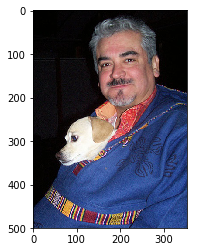

In [116]:
img = imread(images_path + fname+ '.jpg')
plt.imshow(img)

In [117]:
h, w, c = img.shape

In [118]:
h, w

(500, 353)

In [119]:
result = parse_single_annot(annot_path + all_annots[0])

In [120]:
bboxes_only = []
bboxes_only.append(result['dog'][0])
bboxes_only.append(result['person'][0])

In [121]:
bboxes_only

[[48, 240, 195, 371], [8, 12, 352, 498]]

In [16]:
resized_img = resize(img, (224, 224), mode='reflect')
resized_bboxes = np.asarray(bboxes_only)

In [17]:
resized_bboxes[:, 0] = resized_bboxes[:,0] * 224 / w
resized_bboxes[:, 2] = resized_bboxes[:,2] * 224 / w
resized_bboxes[:, 1] = resized_bboxes[:,1] * 224 / h
resized_bboxes[:, 3] = resized_bboxes[:,3] * 224 / h

In [15]:
np.asarray(bboxes_only)

array([[ 48, 240, 195, 371],
       [  8,  12, 352, 498]])

In [18]:
resized_bboxes

array([[ 30, 107, 123, 166],
       [  5,   5, 223, 223]])

In [19]:
dog_bbox = (resized_bboxes[0, 0], resized_bboxes[0, 1]), resized_bboxes[0, 2] - resized_bboxes[0, 0], resized_bboxes[0, 3] - resized_bboxes[0, 1]

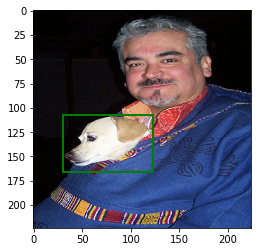

In [25]:
plt.imshow(resized_img)
plt.gca().add_patch(plt.Rectangle(*dog_bbox, fill=False, color='g', linewidth=2))

In [26]:
center_x = 0.5*(resized_bboxes[0, 0] + resized_bboxes[0, 2])
center_y = 0.5*(resized_bboxes[0, 1] + resized_bboxes[0, 3])
center_x, center_y

(76.5, 136.5)

In [29]:
new_center_x , new_center_y = (center_x / 224 / 5, center_y / 224 / 5)

In [30]:
grid_x, grid_y = int(np.floor(new_center_x)), int(np.floor(new_center_y))
grid_x, grid_y

(0, 0)

In [31]:
dog_box = resized_bboxes[0]

In [34]:
(dog_box[2] - dog_box[0]) / 224 / 5, (dog_box[3] - dog_box[1]) / 224 / 5

(0.083035714285714296, 0.052678571428571429)

In [33]:
new_center_x, new_center_y

(0.068303571428571436, 0.121875)

In [128]:
def normalize_box(bounding_box, real_img_size):
    
    dw = 1 / real_img_size[0]
    dh = 1 / real_img_size[1]
    
    center = (0.5 * (bounding_box[0] + bounding_box[2]), 0.5 * (bounding_box[1] + bounding_box[3]))
    
    w_box = bounding_box[2] - bounding_box[0]
    h_box = bounding_box[3] - bounding_box[1]
    
    x = center[0] * dw
    w = w_box * dw
    y = center[1] * dh
    h = h_box * dh
    
    return [x, y, w, h]

In [129]:
test = normalize_box(bboxes_only[0], (w, h))

In [130]:
test

[0.34419263456090654, 0.611, 0.4164305949008499, 0.262]

In [131]:
dw = 224 / w
dh = 224/ h

test[0] = test[0] * dw
test[1] = test[1] * dh
test[2] = test[2] * dw
test[3] = test[3] * dh
test

[0.21841119020295485, 0.273728, 0.2642505758011059, 0.11737600000000001]

In [133]:
xmin = test[0] - test[2] / 2
ymin = test[1] - test[3] / 2

In [140]:
coords = np.array([xmin, ymin, test[2], test[3]])
coords

array([ 0.0862859 ,  0.21504   ,  0.26425058,  0.117376  ])

In [135]:
coords[0] = coords[0] * w
coords[2] = coords[2] * w
coords[1] = coords[1] * h
coords[3] = coords[3] * h
coords

array([  30.45892351,  107.52      ,   93.28045326,   58.688     ])

In [138]:
test2 = bboxes_only[0]

In [139]:
test2[0] = test2[0] * 224 / w
test2[2] = test2[2] * 224 / w
test2[1] = test2[1] * 224 / h
test2[3] = test2[3] * 224 / h
test2

[30.458923512747877, 107.52, 123.73937677053824, 166.208]

In [142]:
np.around(coords, 2)

array([ 0.09,  0.22,  0.26,  0.12])

In [59]:
def un_normalize(normalized_bbox, real_img_size):
    
    dw = 1 / real_img_size[0]
    dh = 1 / real_img_size[1]
    
    xmin = normalized_bbox[0] - normalized_bbox[2] / 2
    ymin = normalized_bbox[1] - normalized_bbox[3] / 2
    
    xmin = xmin / dw
    ymin = ymin / dh
    w = normalized_bbox[2] / dw
    h = normalized_bbox[3] / dh
    
    return (xmin, ymin, w, h)

In [74]:
def plain_normalize(bounding_box, real_img_size):
    
    dw = 1 / real_img_size[0]
    dh = 1 / real_img_size[1]
    
    xmin = bounding_box[0] * dw
    xmax = bounding_box[2] * dw
    ymin = bounding_box[1] * dh
    ymax = bounding_box[3] * dh
    
    return np.round((xmin, ymin, xmax, ymax), 2)


def plain_unnormalize(bounding_box, real_img_size):
    
    dw = 1 / real_img_size[0]
    dh = 1 / real_img_size[1]
    
    xmin = bounding_box[0] / dw
    xmax = bounding_box[2] / dw
    ymin = bounding_box[1] / dh
    ymax = bounding_box[3] / dh
    
    return (xmin, ymin, xmax, ymax)

In [95]:
# First given an a bbox adjust the bbox to the required dimension and then normalize wrt to that dimension

def adjustn_normalize(bbox, real_img_size, target_image_size):
    
    real_w, real_h = real_img_size
    target_w, target_h = target_image_size
    
    dw = target_w / real_w
    dh = target_h / real_h
    
    xmin = (bbox[0] / real_w) * dw
    xmax = (bbox[2] / real_w) * dw
    ymin = (bbox[1] / real_h) * dh
    ymax = (bbox[3] / real_h) * dh
    
    return np.round((xmin, ymin, xmax, ymax), 2)

In [94]:
test = normalize_box(bboxes_only[0], real_img_size=(w, h)) 
test

(0.34419263456090654, 0.611, 0.4164305949008499, 0.262)

In [ ]:
bboxes_only[0] = np.bboxes_only

In [107]:
h, w, c = img.shape
xmin = int(bboxes_only[0][0] * 224 / w)
#xmin = max(min(xmin, real_w), 0)
xmax = int(bboxes_only[0][2] * 224 / w)
#xmax = max(min(xmax, real_w), 0)
ymin = int(bboxes_only[0][1] * 224 / h)
#ymin = max(min(ymin, real_h), 0)
ymax = int(bboxes_only[0][3] * 224 / h)

bbox = (xmin, ymin, xmax, ymax)

In [112]:
img.shape

(500, 353, 3)

In [108]:
bbox

(30, 107, 123, 166)

In [109]:
center_x = (bbox[0] + bbox[2]) * 0.5
center_y = (bbox[1] + bbox[3]) * 0.5
center_x = center_x / 224/ 5
center_y = center_y / 224 / 5
center_x, center_y

(0.06830357142857144, 0.121875)

In [110]:
center_w = (bbox[2] - bbox[0]) / 224 / 5
center_h = (bbox[3] - bbox[1]) / 224 / 5
center_w, center_h

(0.0830357142857143, 0.05267857142857143)

In [111]:
new_xmin = (center_x - center_w / 2) * w
new_xmin

9.455357142857144

In [ ]:
width = (bboxes_only[0][2] - bboxes_only[0][0]) / 224
height = (bboxes_only)

In [103]:
grid_x, grid_y = np.floor(center_x), np.floor(center_y)
grid_x, grid_y

(0.0, 0.0)

In [96]:
to_plot = adjustn_normalize(bboxes_only[0], (w, h), (224, 224))
to_plot

array([ 0.09,  0.22,  0.35,  0.33])

In [ ]:
to_plot[]

In [90]:
to_plot = adjustn_normalize(bboxes_only[0], (w, h), (224, 224))
to_plot

array([  6822.8 ,  24084.48,  27717.62,  37230.59])

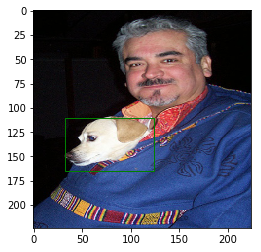

In [98]:
plt.imshow(resized_img)
plt.gca().add_patch(plt.Rectangle((to_plot[0]*w, to_plot[1]*h), (to_plot[2] - to_plot[0])*w, (to_plot[3] - to_plot[1])*h, fill=False, color='g'))

In [75]:
plain_test = plain_normalize(bboxes_only[0], real_img_size=(w, h))

In [76]:
plain_test

array([ 0.14,  0.48,  0.55,  0.74])

In [73]:
np.round(plain_test, 2), plain_test

(array([ 0.14,  0.48,  0.55,  0.74]),
 (0.1359773371104816, 0.48, 0.5524079320113314, 0.742))

In [70]:
plain_unnormalize(plain_test, real_img_size=(w, h))

(48.0, 240.0, 194.99999999999997, 371.0)

In [61]:
bboxes_only[0]

[48, 240, 195, 371]

In [62]:
untest = un_normalize(test, (w, h))

In [53]:
test_unnormalize = (np.round(test, 2) * 100)

In [54]:
test_unnormalize

array([ 34.,  61.,  42.,  26.])

In [55]:
x_min_test = test_unnormalize[0] - test_unnormalize[1] / 2
y_min_test = test_unnormalize[1] - test_unnormalize[3] / 2

In [ ]:
center_x = (xmin + xmax) / 2; xmin = (2 * center_x) - xmax (and xmax = width + xmin) therefore xmin = (2 * center_x) - width - xmin, 2*xmin = 2 * center_x - width therefore xmin = center_x - width / 2 similarly ymin = center_y - height / 2
center_y = (ymin + ymax) / 2

width = xmax - xmin
height = ymax - ymin

In [ ]:
xmax - xmin = 42
xmin + xmax = 68

In [43]:
resized_bboxes

array([[ 30, 107, 123, 166],
       [  5,   5, 223, 223]])

In [44]:
bboxes_only[0]

[48, 240, 195, 371]

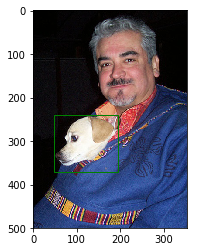

In [63]:
plt.imshow(img)
plt.gca().add_patch(plt.Rectangle((untest[0], untest[1]), untest[2], untest[3], fill=False, color='g'))